In [73]:
%matplotlib notebook
import csv
import numpy as np
from pandas.io.parsers import read_csv
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

In [74]:
def carga_csv(filename):
    valores = read_csv(filename,header= None).values
    return valores.astype(float)

In [75]:
val = carga_csv("ex1data1.csv")  
Y = val[:,1]
aux = val[:,0]
aux = np.reshape(aux, ((len(aux),1)))
X = np.insert(aux, 0, np.ones(val.shape[0]), axis=1)
th =np.zeros((2,1))

In [76]:
def H(th,v):
    h = np.dot(v,th)
    return h

In [77]:
def J(th,x,y):
    h = H(th,x)
    s = np.sum(np.square(np.ravel(h) - y))
    j = s/(2*len(y))
    return j

In [78]:
def gradiente(th,x,y,alpha = 0.01):
    h = H(th,x)
    s0 = np.sum(np.ravel(h)-y)
    s1 = np.sum((np.ravel(h)-y) * x[:,1])
    th[0] -= (s0*alpha)/len(y)
    th[1] -= (s1*alpha)/len(y)
    return th

In [79]:
for i in range(1500):
    th = gradiente(th,X,Y)
    print(J(th, X,Y))

6.737190464870007
5.931593568604956
5.901154707081388
5.895228586444221
5.89009494311733
5.885004158443647
5.879932480491418
5.874879094762575
5.869843911806386
5.8648268653129305
5.859827889932181
5.85484692057229
5.849883892376588
5.844938740722034
5.840011401218361
5.8351018097072265
5.830209902261388
5.825335615183863
5.820478885007099
5.815639648492154
5.81081784262787
5.806013404630044
5.801226271940628
5.796456382226899
5.7917036733806535
5.786968083517396
5.782249550975539
5.777548014315596
5.772863412319381
5.768195683989212
5.76354476854712
5.758910605434049
5.754293134309077
5.749692295048629
5.745108027745684
5.740540272709014
5.735988970462381
5.731454061743792
5.726935487504702
5.722433188909257
5.717947107333528
5.713477184364749
5.709023361800549
5.704585581648199
5.700163786123856
5.695757917651815
5.691367918863752
5.68699373259798
5.682635301898707
5.678292570015292
5.673965480401506
5.669653976714798
5.6653580028155535
5.661077502766381
5.6568124208313595
5.65256270

4.505865944550205
4.505761867981676
4.505658166290941
4.505554838127713
4.5054518821465654
4.50534929700692
4.505247081373027
4.50514523391395
4.505043753303542
4.504942638220435
4.504841887348024
4.5047414993744415
4.504641472992545
4.504541806899905
4.504442499798778
4.504343550396098
4.504244957403459
4.504146719537086
4.504048835517842
4.503951304071183
4.5038541239271686
4.503757293820424
4.5036608124901365
4.503564678680032
4.503468891138365
4.503373448617894
4.503278349875875
4.503183593674036
4.503089178778567
4.502995103960105
4.502901367993709
4.502807969658853
4.502714907739412
4.502622181023632
4.502529788304132
4.502437728377876
4.5023460000461615
4.502254602114603
4.502163533393121
4.502072792695918
4.50198237884147
4.501892290652507
4.501802526956003
4.501713086583153
4.5016239683693655
4.50153517115424
4.501446693781557
4.501358535099268
4.501270693959463
4.5011831692183755
4.501095959736355
4.501009064377854
4.50092248201142
4.500836211509675
4.500750251749296
4.500664

<IPython.core.display.Javascript object>


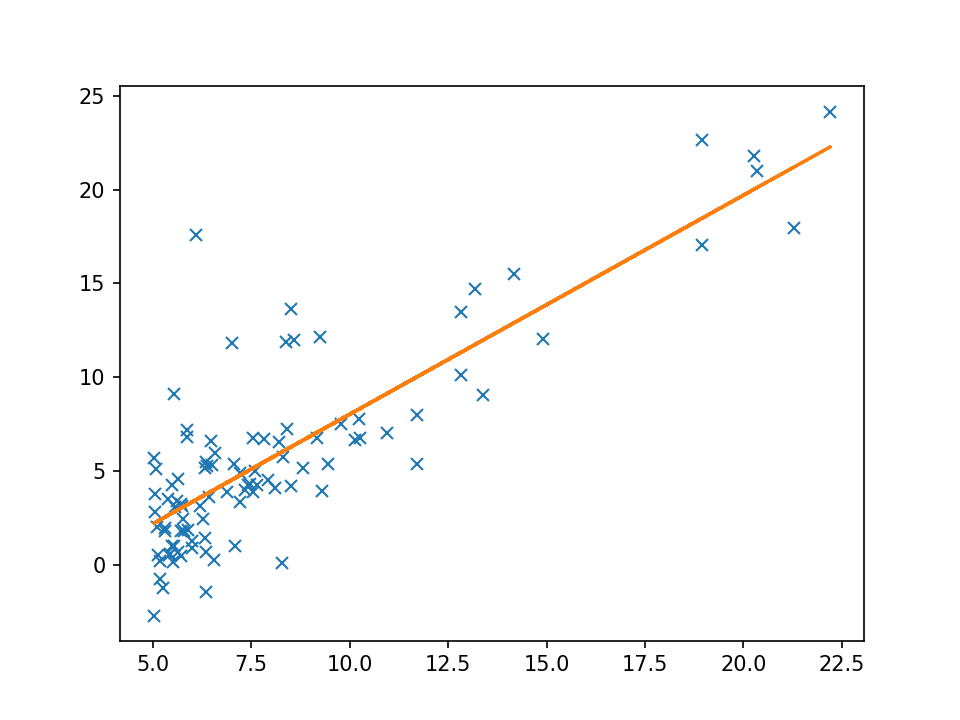

In [80]:
plt.plot()
plt.plot(val[:,0], Y, 'x')
plt.plot(val[:,0],th[0]+th[1]*val[:,0])

In [82]:
def norm(X):
    X_norm = X.copy()
    mu = [np.mean(X[:,0]),np.mean(X[:,1])]
    sigma = [np.std(X[:,0]),np.std(X[:,1])]
    X_norm[:,0] = (X[:,0] - mu[0])/sigma[0]
    X_norm[:,1] = (X[:,1] - mu[1])/sigma[1]
    return X_norm, mu, sigma

In [83]:
val2 = carga_csv("ex1data2.csv")
Y = val2[:,2]
X_norm, mu, sigma = norm(val2[:,:2])
X = np.insert(X_norm, 0, np.ones(val2.shape[0]), axis=1)
th =np.zeros((3,1))

In [84]:
def J_varios(th,x,y):
    h = H(th,x)
    aux = np.ravel(h)-y
    aux = np.reshape(aux, ((len(aux),1)))
    j = np.dot(aux.T,aux)/(2*len(y))
    return j[0][0]

In [85]:
def J_varios2(th,x,y):
    h = H(th,x)
    aux = np.matmul(x,th)-y
    j = np.matmul(np.transpose(aux),aux)/(2*len(y))
    return j

In [86]:
def gradiente_varios(th,x,y,alpha = 0.01):
    m = len(y)
    h = np.ravel(H(th,x))
    s0 = np.sum(h - y)
    s1 = np.sum((h - y) * x[:,1])
    s2 = np.sum((h - y) * x[:,2])

    th[0] -= (s0*alpha)/m
    th[1] -= (s1*alpha)/m
    th[2] -= (s2*alpha)/m
    return th

In [87]:
def inversa (x,y):
    return np.matmul(np.matmul(np.linalg.pinv(np.matmul(x.T,x)), x.T), y)

In [88]:
def grad_desc(th,X,Y):
    for i in range(1500):
        th = gradiente_varios(th,X,Y)
    return th[:,0]

In [89]:
def prediccion(th, x1, x2):
    return th[0] + th[1]*x1 + th[2]*(np.square(x2))

In [90]:
th_i = inversa(X,Y)
th_gr = grad_desc(th,X,Y)
print(prediccion(th_i, 1650, 3))
print(prediccion(th_gr, 1650, 3))

180870071.6407961
180742500.589848


<IPython.core.display.Javascript object>


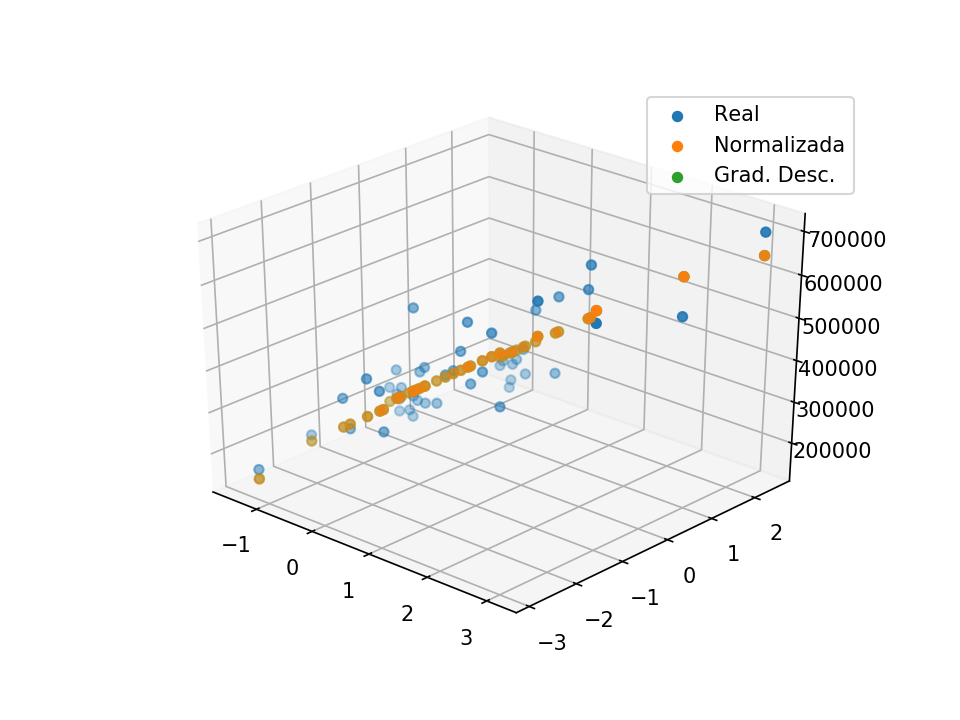

In [92]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,1], X[:,2], Y)
ax.scatter(X[:,1], X[:,2], prediccion(th_i, X[:,1], X[:,2]))
ax.scatter(X[:,1], X[:,2], prediccion(th_gr, X[:,1], X[:,2]))
ax.legend(['Real', 'Normalizada', 'Grad. Desc.'])
#Si la mueves, cambia de color!!! :DDDD

In [42]:
prediccion(th_i, X[:,1], X[:,2]) - Y

array([ -45440.48579376,  -45602.66549865,   26665.87371545,
         11124.65616648,  -68363.20352135,   30337.96235076,
        -39790.56998381,   61214.8878963 ,   41670.98621747,
         27041.00305548,   83974.48201997,   -7018.3958916 ,
         -5330.57003354,  -53478.70493368,  -21820.6092725 ,
        -75810.67533368,  -70139.56853921,   33724.64915894,
        -82892.57706224, -123147.6726268 ,   54645.5170623 ,
         53832.0943028 ,   41954.17719742,   67136.11684836,
         29189.77800171,  -35208.00250746, -199970.58120915,
        -55793.58135833, -107176.26108807,  128758.80345763,
        -47889.22872407,  -23458.29450349,   22994.54942173,
        -81635.85953356,   20115.3050717 ,   11705.99463648,
          4142.28118099,    5701.93143135,   91677.76541007,
         67878.25165188,  -90851.09667715,   43213.7445246 ,
         97258.57462902,  -70386.9351057 ,  -15290.16397946,
         11822.94270642,  -10469.30308364])